In [16]:
# Install libraries & packages
!pip install opencv-python-headless
# !pip install matplotlib

In [ ]:
# Download text files
# !wget https://github.com/afondiel/computer-vision-challenge/tree/main/05_Zero_Image_Segmentation_Traditional_CV/water_coins.png

## Image Segmentation using Traditional CV Approach

![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61252d1629671c610b13f6f5_image-segmentation.png)

## References

- [Image Segmentation Problem - First Principles of Computer Vision](https://www.youtube.com/watch?v=onWJQY5oFhs&list=PL2zRqk16wsdop2EatuowXBX5C-r2FdyNt)
-[An Introduction to Image Segmentation: Deep Learning vs. Traditional [+Examples] - v7labs](https://www.v7labs.com/blog/image-segmentation-guide)
- [Image Segmentation with Watershed Algorithm](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)
- [Guide to Image Segmentation in Computer Vision: Best Practices - Akruti Acharya - November-7-2022](https://encord.com/blog/image-segmentation-for-computer-vision-best-practice-guide/)





## Import Libraries

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from PIL import Image
# urllib
import urllib.request
# from six.moves import urllib
import requests

## Preprocessing: Read original Image, conv to gray, cleaning ...

## Image Segmentation Problem

- Image segmentation is the technique of classifying each pixel of an image into segments based on attributes like color and texture.

- This facilitates detailed image analysis, essential for tasks such as object detection, recognition, and tracking in computer vision.

## Image Segmentation Approaches
- Threshold Method
- Region Based Method
- Edge Based Method
- **Watershed Method**
- Clustering Based Method

## Watershed Method

- The watershed algorithm treats pixel intensities as elevation values and considers the image as a topographic surface.
- Then, it simulates flooding from the markers placed in the image until different regions are flooded and meet at the watershed lines.
- These watershed lines act as boundaries between different segments.

**Pros:**
- Can handle complex shapes and overlapping objects.
- It does not require prior knowledge about the number of segments.
- Suitable for both grayscale and color images.

**Drawbacks**
- Sensitive to noise and artifacts in the image.
- Over-segmentation can occur if markers are not correctly placed.
- Computationally intensive for large images.

**References**
- [Image Segmentation with Watershed Algorithm - OpenCV](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)

### Watershed Implementation Pipeline

1. **Read the Image**: Load the image you want to segment.
2. **Preprocessing**: Convert the image to grayscale and apply Gaussian blur to reduce noise.
3. **Thresholding**: Apply thresholding to create a binary image.
4. **Morphological Operations**: Use morphological operations like opening to further clean up the image.
5. **Finding Sure Background and Sure Foreground**: Use dilation and distance transform to identify sure background and sure foreground areas.
6. **Marker Labelling**: Label the regions of the image using connected component analysis.
7. **Apply Watershed Algorithm**: Use the watershed algorithm to segment the image based on the markers.

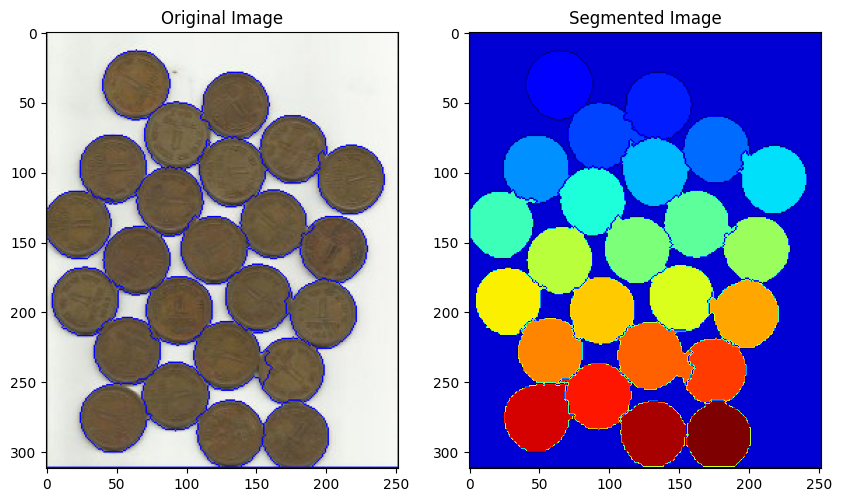

In [ ]:
# Read the image
## Change the path variable if you're working on different environment
## Colab: path = '/content/water_coins.jpg'
# path = 'water_coins.jpg'
# image = cv2.imread(path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gbr => rgb space (for matplotlib) if needed
# img_array = img_array[:,:,::-1]

# Apply Gaussian Blur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to obtain binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Perform sure background and sure foreground detection
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown regions
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers += 1
# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

# Plot the result
plt.figure(figsize=(10,8))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(markers, cmap='jet'), plt.title('Segmented Image')
plt.show()
